In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, precision_recall_curve, roc_curve
from sklearn import set_config
set_config("figure")
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('/Users/sheetalchaudhari/Documents/Module17/bank-additional-full.csv',sep='[;]')

/var/folders/dm/z0vl8yms76v1dbcnd571pk140000gp/T/ipykernel_31754/3607885756.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/Users/sheetalchaudhari/Documents/Module17/bank-additional-full.csv',sep='[;]')


In [3]:
data.head()

,"""age""","""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   "age"             41188 non-null  int64  
 1   "job"             41188 non-null  object 
 2   "marital"         41188 non-null  object 
 3   "education"       41188 non-null  object 
 4   "default"         41188 non-null  object 
 5   "housing"         41188 non-null  object 
 6   "loan"            41188 non-null  object 
 7   "contact"         41188 non-null  object 
 8   "month"           41188 non-null  object 
 9   "day_of_week"     41188 non-null  object 
 10  "duration"        41188 non-null  int64  
 11  "campaign"        41188 non-null  int64  
 12  "pdays"           41188 non-null  int64  
 13  "previous"        41188 non-null  int64  
 14  "poutcome"        41188 non-null  object 
 15  "emp.var.rate"    41188 non-null  float64
 16  "cons.price.idx"  41188 non-null  float6

# Data Preparation

In [5]:
# After reviewing the datasets, I concluded that default, housing, loan and duration of call 
# are most likely the key features 
bank = data[['"default"','"housing"','"loan"','"duration"','"y"']]
bank = bank.rename(columns={'"default"': 'default', '"housing"': 'housing',
                            '"loan"': 'loan', '"duration"': 'duration','"y"': 'subscription'})
# Replace categorical values by numeric values 
bank = bank.replace('"yes"', "1")
bank = bank.replace('"no"', "0")
bank = bank.replace('"unknown"', "-1")
bank.head()

,default,housing,loan,duration,subscription
0,0,0,0,261,0
1,-1,0,0,149,0
2,0,1,0,226,0
3,0,0,0,151,0
4,0,0,1,307,0


# Baseline Model

In [6]:
#Create baseline models with Logistic Regression, KNN, Decision Tree and Support Vector Machines

In [7]:
X = bank[['default', 'housing', 'loan', 'duration']]
y = bank['subscription']

In [8]:
# Split the dataset into training and test datasets
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
pipelines = {
    'lr_baseline' : Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())]),
    'knn_baseline': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]), 
    'dt_baseline' : Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
    'svm_baseline' : Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])
}

In [10]:
scores_baseline = {}
for model_name, pipeline in pipelines.items(): 
    pipeline.fit(X_base_train, y_base_train.values.ravel())
    score = cross_val_score(pipeline, X_base_train, y_base_train.values.ravel(), cv=5, scoring='accuracy').mean()
    scores_baseline[model_name] = score
    print(f"{model_name} with accuracy score {score: .3f}")

lr_baseline with accuracy score  0.893
knn_baseline with accuracy score  0.879
dt_baseline with accuracy score  0.879
svm_baseline with accuracy score  0.891


# Logistic Regression

In [11]:
X_lr = bank[['default', 'housing', 'loan', 'duration']]
y_lr = bank['subscription']

In [12]:
# Split the dataset into training and test datasets
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = 0.2, random_state = 42)

In [13]:
lr_pipe = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())])

In [14]:
#Hyperparameter tuning
hyperparameters = {'classifier__solver': ['liblinear'],
                   'classifier__penalty' : ['l1', 'l2'],
                   'classifier__C' :[0.01, 0.1, 1, 100]
                  }

grid_search = GridSearchCV(lr_pipe, hyperparameters, cv=5, scoring='accuracy')
grid_search.fit(X_lr_train, y_lr_train.values.ravel())
print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best AccuracyScore : {grid_search.best_score_}")

Best Parameters : {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best AccuracyScore : 0.8930804248861912


In [15]:
optimal_lr_model = grid_search.best_estimator_

In [16]:
y_lr_pred = optimal_lr_model.predict(X_lr_test)

In [17]:
print(classification_report(y_lr_test, y_lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.64      0.19      0.29       935

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



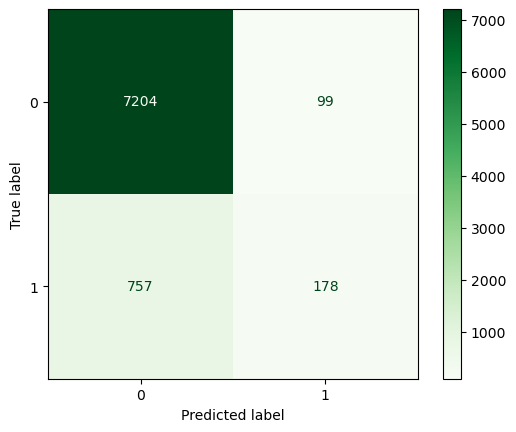

In [18]:
cm_lr = confusion_matrix(y_true=y_lr_test, y_pred=y_lr_pred)
ConfusionMatrixDisplay(cm_lr).plot(cmap=plt.cm.Greens)

In [19]:
roc_auc_lr = roc_auc_score(y_lr_test.values.ravel(),optimal_lr_model.predict_proba(X_lr_test)[:,1],multi_class='raise')
print(f"ROC AUC Score for Logistic Regression Model: {roc_auc_lr} ")

ROC AUC Score for Logistic Regression Model: 0.8419533837460395 


# K Nearest Neighbor 

In [20]:
X_knn = bank[['default', 'housing', 'loan', 'duration']]
y_knn = bank['subscription']

In [21]:
# Split the dataset into training and test datasets
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size = 0.2, random_state = 42)

In [22]:
# Since duration and other feautures have vast difference in the values, 
# there is a need to scale the data 
scaler = StandardScaler()
scaler.fit(X_knn_train)

StandardScaler()

In [23]:
scaler.mean_

array([-2.08012140e-01,  4.99119879e-01,  1.27253414e-01,  2.57746313e+02])

In [24]:
scaler.var_

array([1.64925183e-01, 2.99225326e-01, 1.60286083e-01, 6.73173776e+04])

In [25]:
X_knn_train = pd.DataFrame(scaler.transform(X_knn_train))
X_knn_train.head(10)

,0,1,2,3
0,-1.950182,0.915661,-0.31785,-0.631114
1,0.512207,-0.912443,-0.31785,-0.546321
2,0.512207,-0.912443,-0.31785,-0.943306
3,0.512207,0.915661,-0.31785,-0.631114
4,-1.950182,-0.912443,-0.31785,0.332441
5,0.512207,-0.912443,-0.31785,1.808607
6,0.512207,0.915661,-0.31785,-0.550176
7,-1.950182,-0.912443,-0.31785,-0.218713
8,0.512207,0.915661,-0.31785,-0.634968
9,0.512207,0.915661,-0.31785,-0.322777


In [26]:
#Use Cross validation to determine the best value of k
neighbors = range(1,21)
cv_scores=[]

for k in neighbors: 
    print(f"Calculating for k={k}")
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_knn_train, y_knn_train.values.ravel(),cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Calculating for k=1
Calculating for k=2
Calculating for k=3
Calculating for k=4
Calculating for k=5
Calculating for k=6
Calculating for k=7
Calculating for k=8
Calculating for k=9
Calculating for k=10
Calculating for k=11
Calculating for k=12
Calculating for k=13
Calculating for k=14
Calculating for k=15
Calculating for k=16
Calculating for k=17
Calculating for k=18
Calculating for k=19
Calculating for k=20


In [27]:
cv_scores

[0.8345068285280728,
 0.8809104704097116,
 0.8691047040971169,
 0.8834901365705615,
 0.8792109256449165,
 0.8844309559939301,
 0.8819119878603944,
 0.8852200303490136,
 0.8830045523520486,
 0.885402124430956,
 0.8847040971168436,
 0.886980273141123,
 0.8867678300455235,
 0.887647951441578,
 0.8877996965098636,
 0.8883459787556903,
 0.8890440060698026,
 0.8885584218512899,
 0.8888315629742033,
 0.888588770864947]

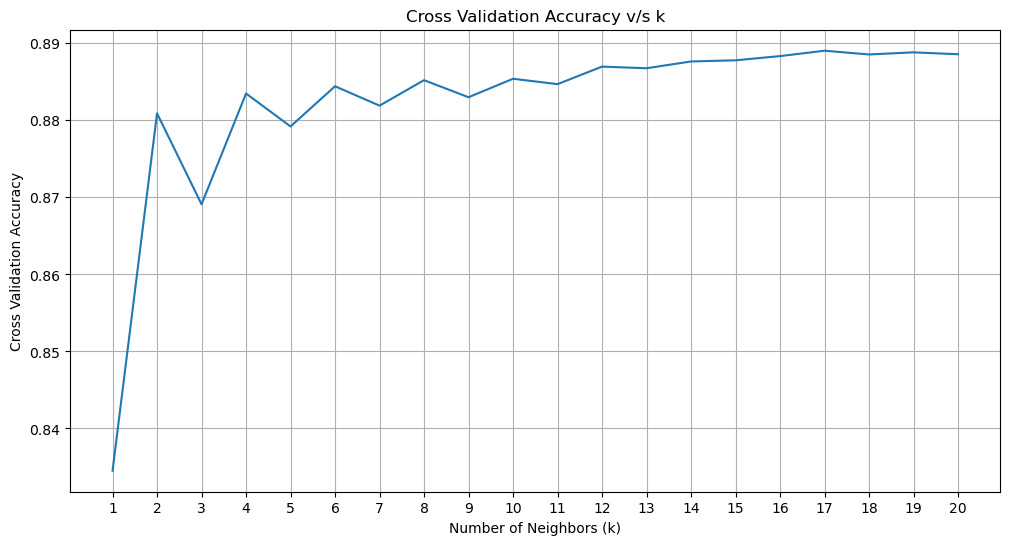

In [28]:
# Plot k v/s accuracy
plt.figure(figsize = (12,6))
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy v/s k')
plt.xticks(range(1,21))
plt.grid()
plt.show()

In [29]:
# Best value of k = 17 based on the above plot
knn_optimal = KNeighborsClassifier(n_neighbors = 17)
knn_optimal.fit(X_knn_train, y_knn_train.values.ravel())
X_knn_test_scaled = pd.DataFrame(scaler.transform(X_knn_test))
y_knn_pred = knn_optimal.predict(X_knn_test_scaled)

In [30]:
knn_optimal.predict_proba(X_knn_test_scaled)

array([[0.58823529, 0.41176471],
       [0.94117647, 0.05882353],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.17647059, 0.82352941],
       [0.94117647, 0.05882353]])

In [31]:
print(classification_report(y_knn_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.56      0.20      0.30       935

    accuracy                           0.89      8238
   macro avg       0.73      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



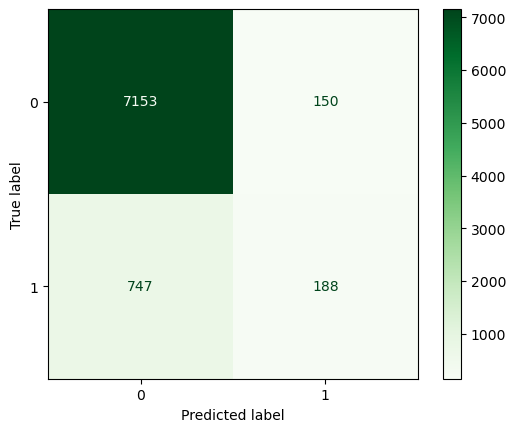

In [32]:
cm_knn = confusion_matrix(y_true=y_knn_test, y_pred=y_knn_pred)
ConfusionMatrixDisplay(cm_knn).plot(cmap=plt.cm.Greens)

In [33]:
roc_auc_knn = roc_auc_score(y_knn_test.values.ravel(),knn_optimal.predict_proba(X_knn_test_scaled)[:,1],multi_class='raise')
print(f"ROC AUC Score for KNN Model: {roc_auc_knn} ")

ROC AUC Score for KNN Model: 0.8021699382203928 


# Decision Tree

In [34]:
X_dt = bank[['default', 'housing', 'loan', 'duration']]
y_dt = bank['subscription']

In [35]:
# Split the dataset into training and test datasets
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size = 0.2, random_state = 42)

In [36]:
dt_pipe = Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())])
#Hyperparameter tuning
hyperparameters = {'classifier__criterion': ['entropy', 'gini'], 
                   'classifier__max_depth' : [10, 20, 50]
                 }

grid_search = GridSearchCV(dt_pipe, hyperparameters, cv=5, scoring='accuracy')
grid_search.fit(X_dt_train, y_dt_train.values.ravel())
print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best AccuracyScore : {grid_search.best_score_}")

Best Parameters : {'classifier__criterion': 'gini', 'classifier__max_depth': 10}
Best AccuracyScore : 0.889256449165402


In [37]:
optimal_dt_model = grid_search.best_estimator_
y_dt_pred = optimal_dt_model.predict(X_dt_test)

In [38]:
y_dt_pred

array(['0', '0', '0', ..., '0', '1', '0'], dtype=object)

In [39]:
print(classification_report(y_dt_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.21      0.32       935

    accuracy                           0.89      8238
   macro avg       0.76      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



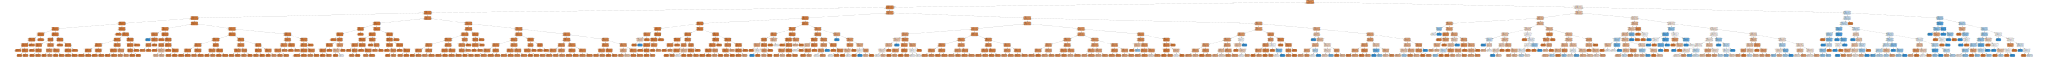

In [40]:
viz = export_graphviz(optimal_dt_model['classifier'], feature_names = X_dt_train.columns, 
                      rounded = True, filled= True)
graph = graphviz.Source(viz)
graph

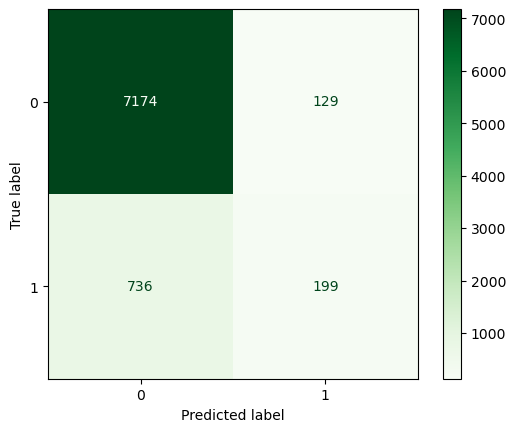

In [41]:
cm_dt = confusion_matrix(y_true=y_dt_test, y_pred=y_dt_pred)
ConfusionMatrixDisplay(cm_dt).plot(cmap=plt.cm.Greens)

In [42]:
roc_auc_dt = roc_auc_score(y_dt_test.values.ravel(),optimal_dt_model.predict_proba(X_dt_test)[:,1],multi_class='raise')
print(f"ROC AUC Score for Decision Tree Model: {roc_auc_dt} ")

ROC AUC Score for Decision Tree Model: 0.8120862351637779 


# Support Vector Machines

In [43]:
X_svm = bank[['default', 'housing', 'loan', 'duration']]
y_svm = bank['subscription']
# Split the dataset into training and test datasets
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, test_size = 0.2, random_state = 42)

In [44]:
# The 3 cells below are commented as the execution of those cells never completed. 

In [45]:
#kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#cv_scores = []
#for k in kernels: 
#    print(f"Evaluating {k}")
#    svc = SVC(kernel=k)
#    scores = cross_val_score(svc, X_svm_train, y_svm_train, cv=5, scoring='accuracy')
#    cv_scores.append(scores.mean())

#optimal_kernel = kernels[cv_scores.index(max(cv_scores))]
#print(f"Optimal kernal is {optimal_kernel} with cross-validation score of {max(cv_scores)}")

In [46]:
# Since the execution of the optimal kernel determination takes a very long time 
 
#cv_scores = []
#svc = SVC(kernel='linear')
#scores = cross_val_score(svc, X_svm_train, y_svm_train, cv=5, scoring='accuracy')
#cv_scores.append(scores.mean())

#print(f"Linear kernal's cross-validation score of {max(cv_scores)}")

In [47]:
#svc = SVC(kernel='linear')
#svc.fit(X_svm_train, y_svm_train)

In [48]:
svc_pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC(probability=True))])
svc_pipe.fit(X_svm_train, y_svm_train.values.ravel())
y_svm_pred = svc_pipe.predict(X_svm_test)

In [49]:
print(classification_report(y_svm_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.63      0.16      0.25       935

    accuracy                           0.89      8238
   macro avg       0.77      0.57      0.60      8238
weighted avg       0.87      0.89      0.86      8238



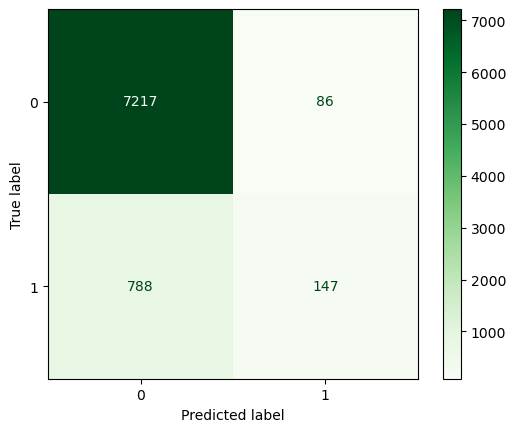

In [50]:
cm_svc = confusion_matrix(y_true=y_svm_test, y_pred=y_svm_pred)
ConfusionMatrixDisplay(cm_svc).plot(cmap=plt.cm.Greens)

In [51]:
roc_auc_svm = roc_auc_score(y_svm_test.values.ravel(),svc_pipe.predict_proba(X_svm_test)[:,1],multi_class='raise')
print(f"ROC AUC Score for Support Vector Machine Model: {roc_auc_svm} ")

ROC AUC Score for Support Vector Machine Model: 0.6712966834375442 
